# Homework 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

### Problem 0

Write a summary of all important formulas and definitions from these eigenvalue notes.

Characteristic Polynomial ($2 \times 2$)
$$P_A(\lambda) = det(A - \lambda I_2) = \lambda^2 - tr(A)\lambda + det(A)$$

Discriminant of A:
$$D = [tr(A)]^2 - 4det(A)$$
- If $D > 0$, 2 Real and Distinct Eigenvalues
- If $D < 0$, 1 Pair of Complex Conjugate Eigenvalues
- If $D = 0$, 2 Real and Equal Eigenvalues

Characteristic Polynomial ($n \times n$)
$$P_A(\lambda) = det(A - \lambda I_n)$$
- Easy to solve when $A$ is a triagular matrix, such that the product of the diagonal entries is the Characteristic Polynomial.

### Problem 1

Reproduce Fig 5 of the article "Chaos in the cubic mapping".

Note: the procedure on how to produce bifurcation diagrams, in addition of what I explained in class, it is briefly explained in the first paragraph in p18 of our textbook.

<img src="figs/prob1.PNG" width="300" />

In [2]:
def plot_bifurication(a_ranges, f, title, filename, swap_x_a=False):
    fig, ax = plt.subplots(ncols=len(a_ranges), figsize=(6 * len(a_ranges), 5))
    if len(a_ranges) == 1:
        ax = [ax]
    for axis, a_vals in zip(ax, a_ranges):
        x_vals = []
        plot_a_vals = []
        for a in a_vals:
            x = random.random()
            for _ in range(int(1e3)):
                x = f(a, x)
            for _ in range(int(1e2)):
                x = f(a, x)
                x_vals.append(x)
                plot_a_vals.append(a)
        if swap_x_a:
            axis.plot(x_vals, plot_a_vals, ',')
            axis.invert_yaxis()
        else:
            axis.plot(plot_a_vals, x_vals, ',')

        axis.set_xlabel('$g_a(x)$')
        axis.set_ylabel('$a$')
        axis.set_title('Bifurication - ' + title)
        axis.grid()

    plt.savefig(filename + '.png')

    return fig

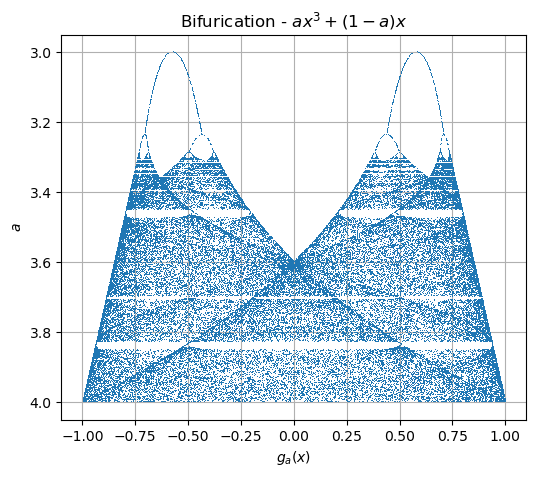

In [3]:
a = plot_bifurication([np.linspace(3, 4, int(1e3))], lambda a,x: a*x**3 + (1 - a)*x, '$ax^3 + (1-a)x$', 'figs/prob1-plot', True)

### Problem 2

Reproduce Fig. 2.3 (p51 of our textbook). Note that Fig. 2.3.b is with $b=-0.3$ and $a=1.5$ (and not $a=1.4$)

<img src="figs/prob2.PNG" width="600" />

In [4]:
def plot_henon_analysis(a_range, b_range, x_range, y_range, num_iters, filename):
    fig, ax = plt.subplots(ncols=len(a_range), figsize=(6 * len(a_range), 5))

    if len(a_range) == 1:
        ax = [ax]

    for (a, b, axis) in zip(a_range, b_range, ax):
        diverged_points = []
        for x0 in x_range:
            for y0 in y_range:
                x = x0
                y = y0
                try:
                    for _ in range(num_iters):
                        prev_x = x
                        prev_y = y
                        x = a - prev_x**2 + b*prev_y
                        y = prev_x
                        if np.isinf(x) or np.isnan(x) or np.isinf(y) or np.isnan(y):
                            raise Exception("invalid number")
                except (RuntimeError, Exception):
                    diverged_points.append((x0, y0))

        diverged_x = [x[0] for x in diverged_points]
        diverged_y = [x[1] for x in diverged_points]

        axis.plot(diverged_x, diverged_y, 'k,')
        axis.set_xlabel('$x$')
        axis.set_ylabel('$y$')
        axis.set_title('Henon - a = $' + str(a) + '$, b = $' + str(b) + '$')
        axis.grid()

    plt.savefig(filename + '.png')

    return fig

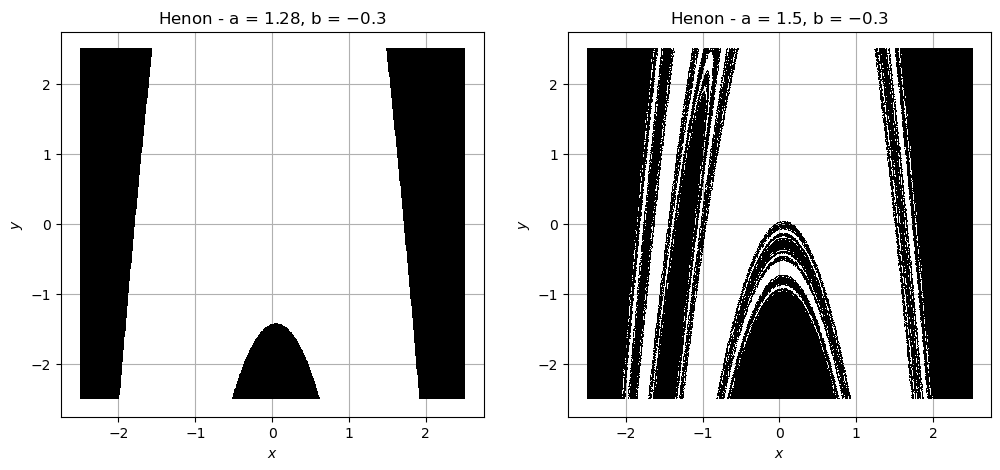

In [5]:
a = plot_henon_analysis([1.28, 1.5], [-0.3, -0.3], np.linspace(-2.5, 2.5, 700), np.linspace(-2.5, 2.5, 700), int(50), 'figs/prob2-plot')

### Problem 3

Reproduce Fig. 2.10 (p61 of our textbook).

<img src="figs/prob3.PNG" width="600" />

In [6]:
def plot_henon_analysis_3(a, b, x_range, y_range, fixed_point, tol, num_iters, filename):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

    converged_points = []
    diverged_points = []
    for x0 in x_range:
        for y0 in y_range:
            x = x0
            y = y0
            try:
                for _ in range(num_iters):
                    prev_x = x
                    prev_y = y
                    x = a - prev_x**2 + b*prev_y
                    y = prev_x
                    if np.isinf(x) or np.isnan(x) or np.isinf(y) or np.isnan(y):
                        raise Exception("invalid number")
                    if np.abs(x - fixed_point[0]) < tol and np.abs(y - fixed_point[1]) < tol:
                        converged_points.append((x0, y0))
            except (RuntimeError, Exception):
                diverged_points.append((x0, y0))

    diverged_x = [x[0] for x in diverged_points]
    diverged_y = [x[1] for x in diverged_points]
    converged_x = [x[0] for x in converged_points]
    converged_y = [x[1] for x in converged_points]

    ax[0].plot(diverged_x, diverged_y, 'k,')
    ax[1].plot(converged_x, converged_y, 'k,')
    ax[1].plot([fixed_point[0]], [fixed_point[1]], 'k,')
    for i in range(len(ax)):
        ax[i].set_xlabel('$x$')
        ax[i].set_ylabel('$y$')
        ax[i].set_title('Henon - a = $' + str(a) + '$, b = $' + str(b) + '$')
        ax[i].grid()

    plt.savefig(filename + '.png')

    return fig

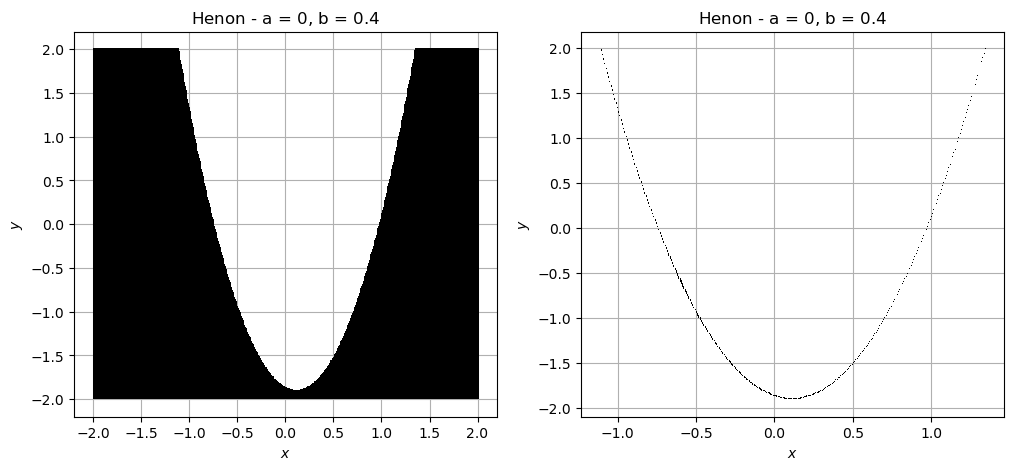

In [7]:
a = plot_henon_analysis_3(0, 0.4, np.linspace(-2, 2, 500), np.linspace(-2, 2, 500), (-0.6, -0.6), 1e-2, int(100), 'figs/prob3-plot')

### Problem 4

Reproduce Fig. 2.11 (p61 of our textbook).

<img src="figs/prob4.PNG" width="400" />

In [8]:
def plot_henon_analysis_4(a, b, x_range, y_range, num_iters, filename):
    fig, ax = plt.subplots()

    converged_points = []
    diverged_points = []
    for x0 in x_range:
        for y0 in y_range:
            x = x0
            y = y0
            try:
                for _ in range(num_iters):
                    prev_x = x
                    prev_y = y
                    x = a - prev_x**2 + b*prev_y
                    y = prev_x
                    if np.isinf(x) or np.isnan(x) or np.isinf(y) or np.isnan(y):
                        raise Exception("invalid number")
                converged_points.append((x, y))
            except (RuntimeError, Exception):
                diverged_points.append((x0, y0))

    diverged_x = [x[0] for x in diverged_points]
    diverged_y = [x[1] for x in diverged_points]
    converged_x = [x[0] for x in converged_points]
    converged_y = [x[1] for x in converged_points]

    ax.plot(diverged_x, diverged_y, 'k,')
    ax.plot(converged_x, converged_y, 'k,')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('Henon - a = $' + str(a) + '$, b = $' + str(b) + '$')
    ax.grid()

    plt.savefig(filename + '.png')

    return fig

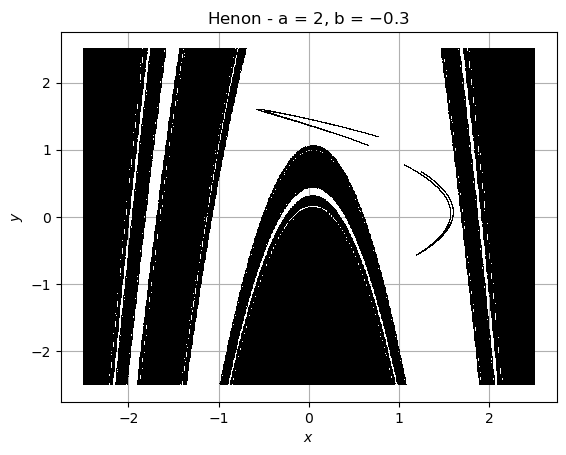

In [9]:
a = plot_henon_analysis_4(2, -0.3, np.linspace(-2.5, 2.5, 700), np.linspace(-2.5, 2.5, 700), int(50), 'figs/prob4-plot')